## Observations and Insights 

Capomulin and ramicane are two drug regimens that had a lower tumor volume for their drug regimen then some of the other drug cases. This leads us to believe that these two drug regimens reduce the size of tumors better.
From our bar graph, we can see that Capomulin and Ramicane had the largest mice participants, while the rest of the study groups had a slightly smaller amount of participants. This is most likely due to their effect to the tumor volume.
Their is a strong correlation between weight and average tumor volume. When the mouse increases in weight, so does the tumor volume. We can say that it is a positive correlation since they are both moving in the same direction.

In [27]:
%matplotlib notebook

In [28]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np
import os

# Study data files
mouse_metadata_path = os.path.join("Pymaceuticals", "data" , "Mouse_metadata.csv")
study_results_path = os.path.join("Pymaceuticals", "data" , "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data_df=pd.merge(mouse_metadata, study_results, how="outer", on="Mouse ID")

# Display the data table for preview
data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [29]:
# Checking the number of mice.
mice_df = data_df["Mouse ID"].nunique()
mice_df

249

In [30]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_mice_id = data_df.loc[data_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
dup_mice_id

array(['g989'], dtype=object)

In [31]:
# Optional: Get all the data for the duplicate mouse ID. 
dup_mice_df = data_df.loc[data_df["Mouse ID"]== "g989", :]
dup_mice_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df= data_df[data_df["Mouse ID"].isin(dup_mice_id)==False]
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [33]:
# Checking the number of mice in the clean DataFrame.
all_mice_df=clean_df["Mouse ID"].nunique()
all_mice_df

248

## Summary Statistics

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
#tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

reg_mean=clean_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

reg_median=clean_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

reg_var=clean_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

reg_sdev=clean_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

reg_sem=clean_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

drug_summ_df=pd.DataFrame({"Mean": reg_mean,
           "Median": reg_median,
           "Variance": reg_var,
           "Standard Deviation": reg_sdev,
           "SEM": reg_sem})
drug_summ_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the 
#tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
agg_method=clean_df.groupby("Drug Regimen")

agg_table_df=agg_method.aggregate(["mean","median","var","std","sem"])["Tumor Volume (mm3)"]
agg_table_df

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<IPython.core.display.Javascript object>


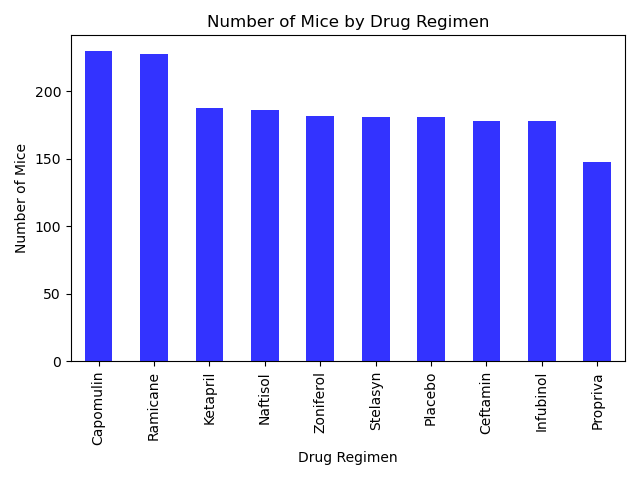

In [36]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
mice_per_drug=clean_df["Drug Regimen"].value_counts().plot(kind="bar", color="blue", alpha=0.8, align='center',
                                                           title="Number of Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()

<IPython.core.display.Javascript object>


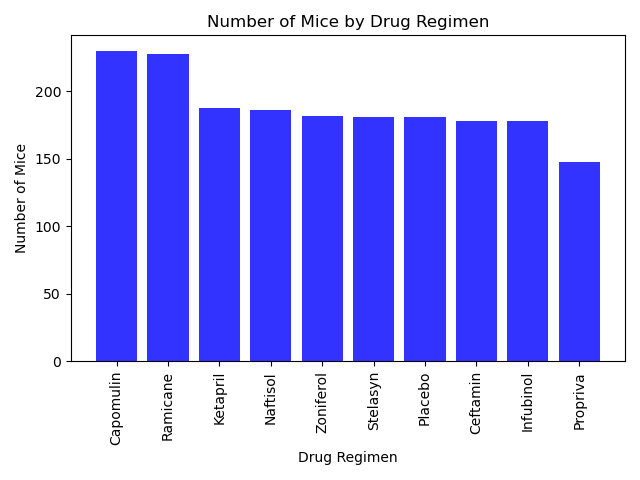

In [38]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_counts = clean_df['Drug Regimen'].value_counts()

#set x-axis to the length of the above
x_axis = np.arange(len(drug_counts))

fig1, ax1 = plt.subplots()
plt.bar(x_axis, drug_counts, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn',
                            'Placebo', 'Ceftamin', 'Infubinol', 'Propriva'],  rotation='vertical')



plt.title("Number of Mice by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()
plt.tight_layout()

<IPython.core.display.Javascript object>


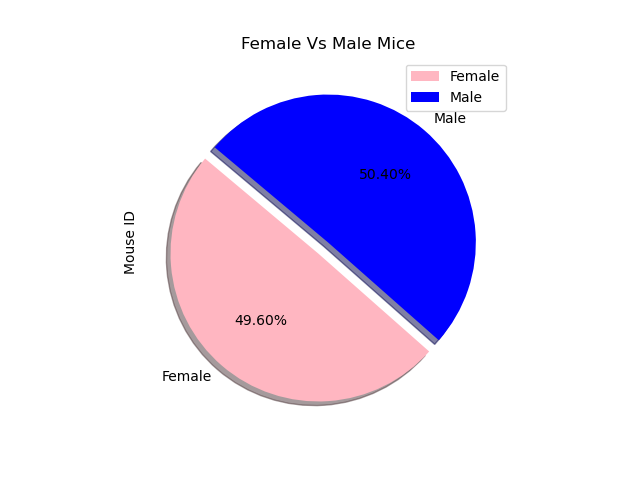

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = clean_df.groupby("Sex").nunique()["Mouse ID"]
fig1, ax1 = plt.subplots()
gender.plot(kind="pie", y="Gender", shadow=True, startangle=140, colors= ["lightpink", "blue"], explode=[0.1,0], autopct='%.2f%%')
plt.title("Female Vs Male Mice")
plt.legend(loc="best")

<IPython.core.display.Javascript object>


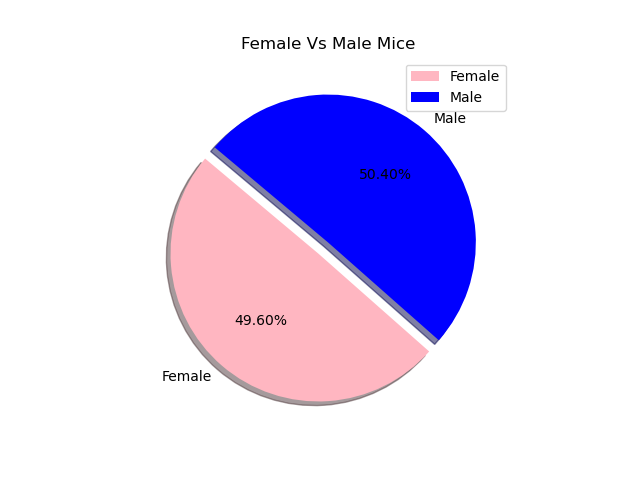

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = clean_df.groupby("Sex").nunique()["Mouse ID"]
fig1, ax1 = plt.subplots()
labels=["Female", "Male"]
colors=["lightpink", "blue"]
explode=(0.1,0)
plt.pie(gender_pyplot, labels=labels, colors=colors,
        autopct="%.2f%%", shadow=True, startangle=140, explode=explode)
plt.title("Female Vs Male Mice")
plt.legend(loc="best")

## Quartiles, Outliers and Boxplots

In [15]:
#Caluclate the final tumor volume of each mouse across four of the treatment regimens: 
#Capomulin, Ramicane, Infubinol, and Ceftamin

#Start by getting the last (greatest timepoint) for each mouse
max_timepoint_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
max_timepoint_df

#merge max_timepoint_df to our combined_df
merged_df = pd.merge(data_df, max_timepoint_df, on='Mouse ID')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,45
1889,z969,Naftisol,Male,9,30,30,65.841013,3,45
1890,z969,Naftisol,Male,9,30,35,69.176246,4,45
1891,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [16]:
#Put treatments into a list for loop 

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

#Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

#Calculate the IQR and quantitatively determine if there are any potential outliers.

for treatment in treatments:
    
    #Locate the rows which contain mice on each drug and get the tumor volumes 
    
    drug_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    #add subset 
    
    final_volume_df = drug_df.loc[drug_df['Timepoint'] == drug_df['max_timepoint']]
    
    #create a series that lists all final tumor values
    values = final_volume_df['Tumor Volume (mm3)']
    
    tumor_vol_data.append(values)
    

    #Determine outliers using upper and lower bounds
    
    quartiles = values.quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq
    
    print(f'IQR for {treatment}: {iqr}')
    
    #find upper and lower bounds to identify outliers
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'Lower Bound for {treatment}: {lower_bound}')
    print(f'Upper Bound for {treatment}: {upper_bound}')
    
    #Check for ouliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |
                                (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    
    print(f'Number of {treatment} outliers: {outliers_count}')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


<IPython.core.display.Javascript object>


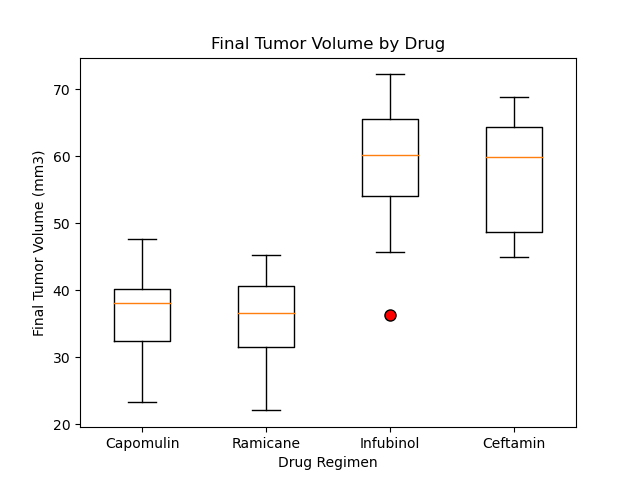

In [17]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# Edit outliers on boxplot
flierprops = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')

# Plot boxplot
fig1,axe1=plt.subplots()
plt.boxplot(tumor_vol_data, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

<IPython.core.display.Javascript object>


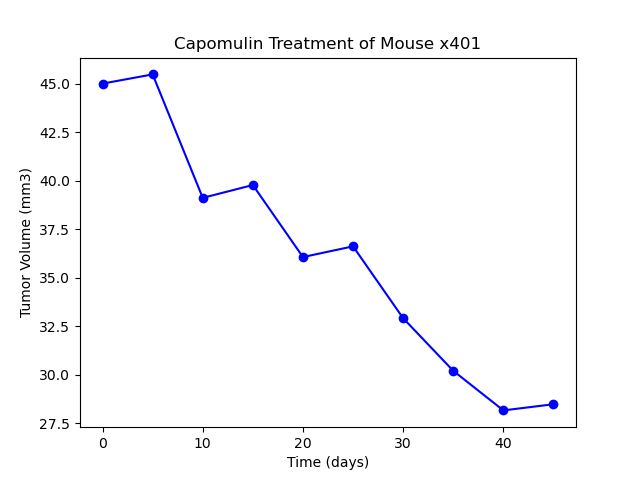

In [18]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#find a mouse    
merged_df.loc[merged_df['Drug Regimen'] == 'Capomulin'].head()

mouse = merged_df.loc[merged_df['Mouse ID'] == 'x401']

#Plot line chart
fig1,axe1=plt.subplots()
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker='o', color = 'b')

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse x401")

# Display plot
plt.show()


<IPython.core.display.Javascript object>


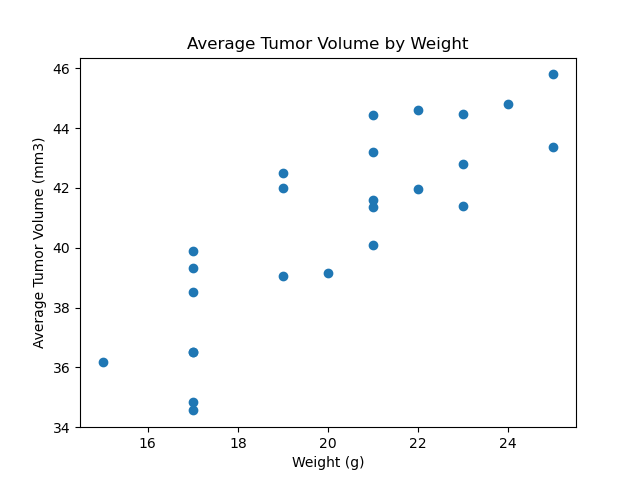

In [19]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Make df for capomulin
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
capomulin_df

#Find Average Tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x_data = final_avg_vol_df['Weight (g)']
y_data = final_avg_vol_df['avg_tumor_vol']

fig1,axe1=plt.subplots()
plt.scatter(x_data, y_data)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume for Capomulin regimen is 0.84. This implies a strong, positive relationship.


<IPython.core.display.Javascript object>


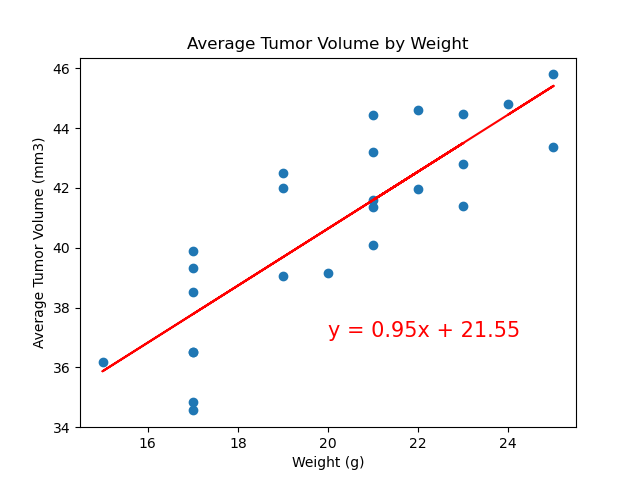

In [20]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
#Use same code from above to get scatter data
#Make df for just capomulin
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
capomulin_df

#Find Average Tumor volume for each mouse
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df

avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x_data = final_avg_vol_df['Weight (g)']
y_data = final_avg_vol_df['avg_tumor_vol']

#calculate correlation coefficient 
correlation_coef = st.pearsonr(x_data, y_data)

# Print the answer to above calculation
print(f'The correlation between weight and average tumor volume for Capomulin regimen is {round(correlation_coef[0],2)}. \
This implies a strong, positive relationship.')

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_data, y_data)
regress_values = x_data * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot scatter and linear regression
fig1,axe1=plt.subplots()
plt.scatter(x_data, y_data)
plt.plot(x_data, regress_values, 'r-')

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()
